In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import math
import warnings
# 경고창 숨기기
warnings.filterwarnings('ignore')

In [53]:
from google.colab import drive
drive.mount('/content/drive')

import os

path = "drive/MyDrive"
file_path = os.path.join(path, "World Happiness Report(dropped).csv")
print(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive/MyDrive/World Happiness Report(dropped).csv


In [54]:
df_hp = pd.read_csv(file_path)

In [55]:
# 비어있는 데이터에 평균값 넣기

df_hp = df_hp.fillna(df_hp.mean())


      Life Ladder  Log GDP Per Capita
0        3.723590            7.350416
1        4.401778            7.508646
2        4.758381            7.613900
3        3.831719            7.581259
4        3.782938            7.660506
...           ...                 ...
1985     3.616480            7.783066
1986     2.693523            7.697755
1987     3.159802            7.596050
1988     3.154578            7.656878
1989     3.296220            7.670123

[1990 rows x 2 columns]


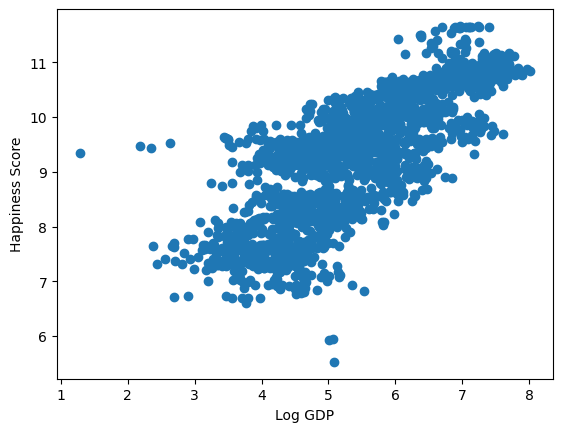

In [56]:
# df_hp_2
df_hp_1 = df_hp.drop("Country Name", axis=1)
df_hp_2 = df_hp_1.drop("Regional Indicator", axis=1)
df_hp_3 = df_hp_2[['Life Ladder', 'Log GDP Per Capita']]
df_hp_4 = df_hp_2[['Life Ladder', 'Social Support']]
df_hp_5 = df_hp_2[['Life Ladder', 'Healthy Life Expectancy At Birth']]
df_hp_6 = df_hp_2[['Life Ladder', 'Freedom To Make Life Choices']]
df_hp_7 = df_hp_2[['Life Ladder', 'Generosity']]
df_hp_8 = df_hp_2[['Life Ladder', 'Perceptions Of Corruption']]
df_hp_9 = df_hp_2[['Life Ladder', 'Positive Affect']]
df_hp_10 = df_hp_2[['Life Ladder', 'Negative Affect']]
df_stack = np.stack([df_hp_3,df_hp_4,df_hp_5,df_hp_6,df_hp_7,df_hp_8,df_hp_9,df_hp_10])
print(df_hp_3)
plt.scatter(df_hp_3[['Life Ladder']], df_hp_3[['Log GDP Per Capita']])
plt.xlabel('Log GDP')
plt.ylabel('Happiness Score')
plt.show()

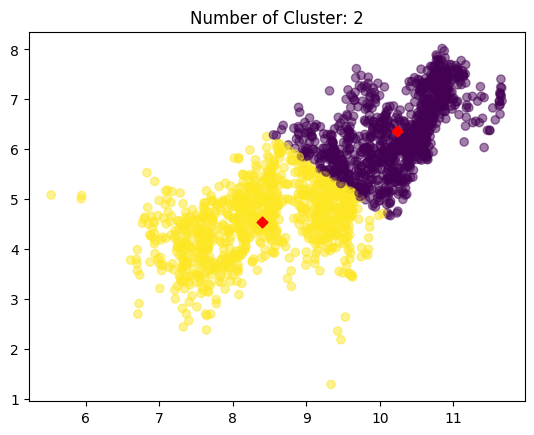

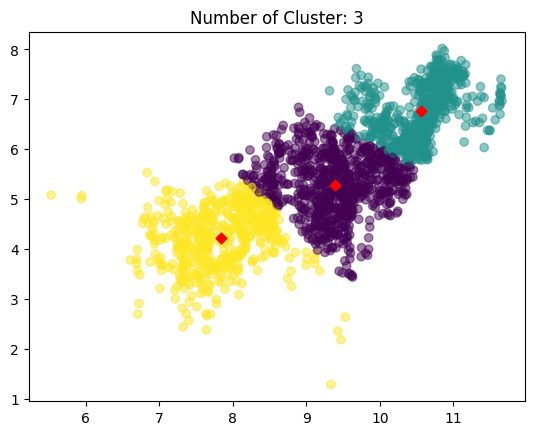

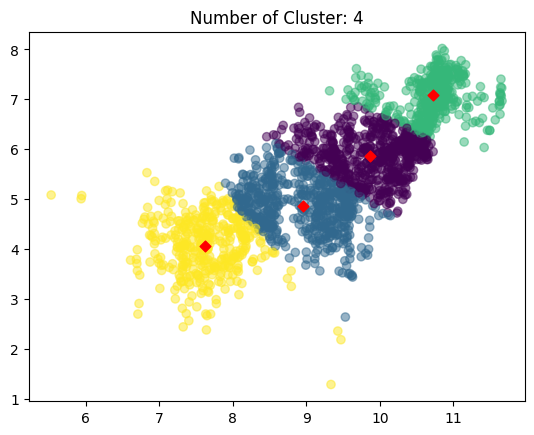

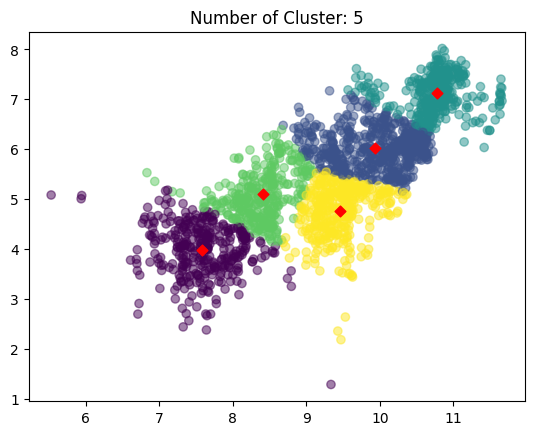

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns
def kmeans_clustering(num_clu , data):
# create model and prediction
  for i in range(len(num_clu)):
    n = num_clu[i]
    model = KMeans(n_clusters=n,max_iter=500, random_state=0)
    model.fit(data)
    predict = pd.DataFrame(model.predict(data))

    predict.columns=['predict']

    # concatenate labels to df as a new column
    r = pd.concat([data,predict],axis=1)
    #print(r)
    centers = pd.DataFrame(model.cluster_centers_,columns=(['Life Ladder','Log GDP Per Capita']))

    center_x = centers['Log GDP Per Capita']
    center_y = centers['Life Ladder']
    # scatter plot
    plt.scatter(r['Log GDP Per Capita'],r['Life Ladder'],c=r['predict'],alpha=0.5)
    plt.scatter(center_x,center_y,s=30,marker='D',c='r')
    plt.title('Number of Cluster: '+ str(n))
    plt.show()

kmeans_clustering([2, 3, 4, 5] , df_hp_3)

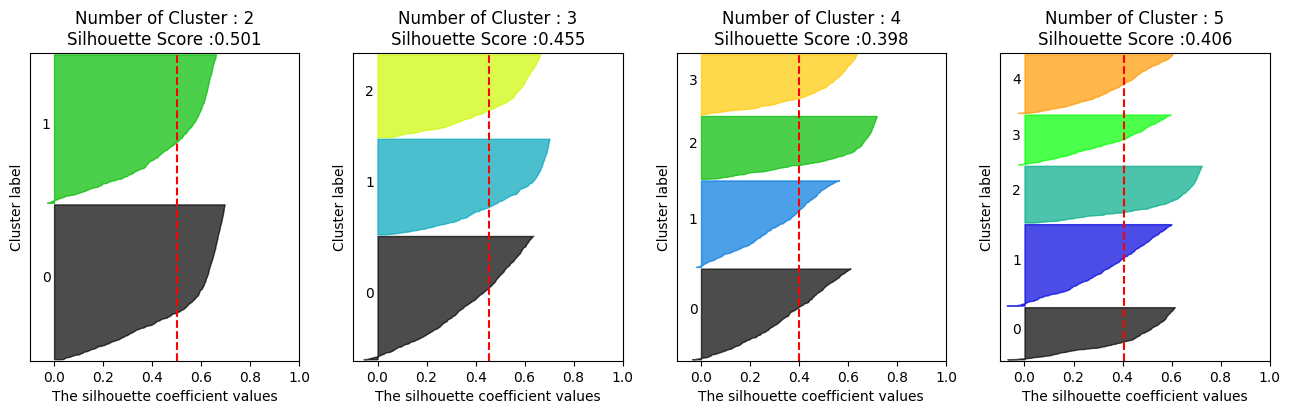

In [58]:
def visualize_silhouette(cluster_lists, X_features):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화
visualize_silhouette([ 2, 3, 4, 5], df_hp_3)

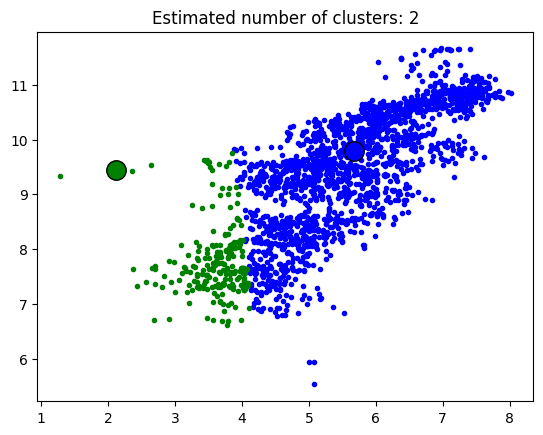

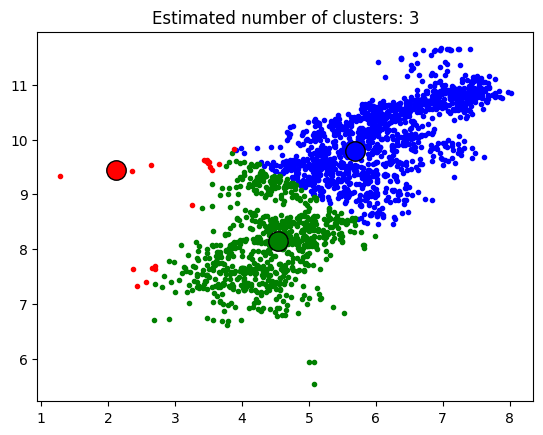

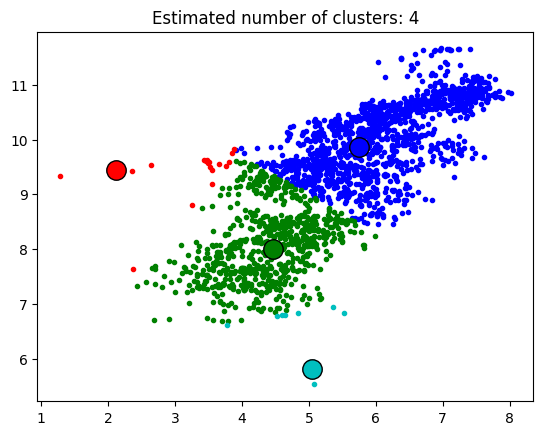

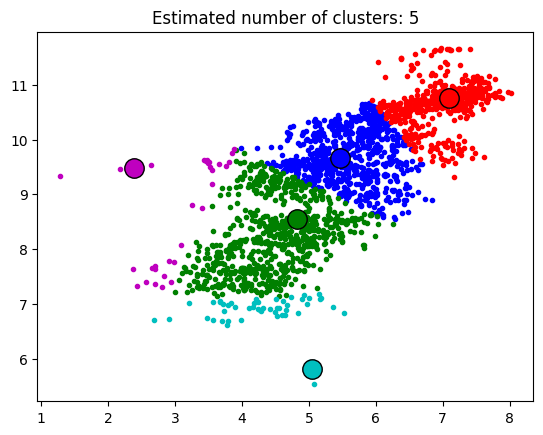

In [63]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from sklearn import metrics

# #############################################################################

# MeanShift를 사용한 컴퓨팅 클러스터링
df_hp_3arr = df_hp_3.to_numpy()


def ms_cluster(x, data):
  for i in range (len(x)):
    # 다음 대역폭은 다음을 사용하여 자동으로 감지 할 수 있습니다.
    bandwidth = estimate_bandwidth(data, quantile=x[i], n_samples=1900)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)

    # #############################################################################
    # 플롯 결과
    import matplotlib.pyplot as plt
    from itertools import cycle

    plt.figure(1)
    plt.clf()

    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        my_members = labels == k
        cluster_center = cluster_centers[k]
        plt.plot(df_hp_3arr[my_members, 0], df_hp_3arr[my_members, 1], col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                markeredgecolor='k', markersize=14)
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

ms_cluster([0.245, 0.235, 0.2, 0.15], df_hp_3arr)

0.33356596238585173 [ 0.7625263  -0.5864407  -0.41888194 ...  0.75465196  0.75281451
  0.7680247 ]
0.43732995666053237 [0.38613574 0.57012451 0.59557309 ... 0.06083961 0.04320544 0.13819701]
0.3781808182757486 [0.19331178 0.20865364 0.20117223 ... 0.24850179 0.23225081 0.28961092]
0.3382963222251124 [-0.28891736 -0.14161917  0.0194049  ... -0.13696833 -0.15075994
 -0.05244779]


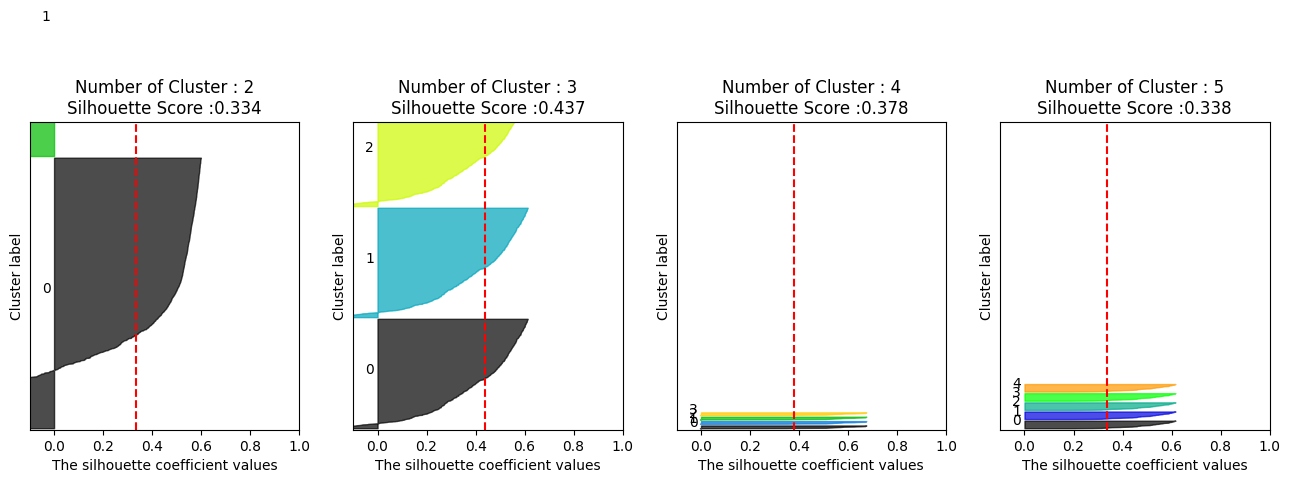

In [60]:
def ms_sil(x, data):
  n_cols = len(x)
  fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
  for i in range (len(x)):
    bandwidth = estimate_bandwidth(data, quantile=x[i], n_samples=1900)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)

    sil_avg = silhouette_score(data, labels)
    sil_values = silhouette_samples(data, labels)

    print(sil_avg, sil_values)
    y_lower = 10
    axs[i].set_title('Number of Cluster : '+ str(n_clusters_)+'\n' \
                      'Silhouette Score :' + str(round(sil_avg,3)) )
    axs[i].set_xlabel("The silhouette coefficient values")
    axs[i].set_ylabel("Cluster label")
    axs[i].set_xlim([-0.1, 1])
    axs[i].set_ylim([0, len(data) + (n_clusters_ + 1) * 10])
    axs[i].set_yticks([])  # Clear the yaxis labels / ticks
    axs[i].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    for j in range(n_clusters_):
        jth_cluster_sil_values = sil_values[labels==i]
        jth_cluster_sil_values.sort()

        size_cluster_j = jth_cluster_sil_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.nipy_spectral(float(j) / n_clusters_)
        axs[i].fill_betweenx(np.arange(y_lower, y_upper), 0, jth_cluster_sil_values, \
                            facecolor=color, edgecolor=color, alpha=0.7)
        axs[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    axs[i].axvline(x=sil_avg, color="red", linestyle="--")


ms_sil([0.245, 0.235, 0.2, 0.15], df_hp_3arr)